In [4]:
import pandas as pd
import numpy
import glob
import os

In [6]:
# Directory containing CSV files
path = r"D:\Stock_Influence_Impact_Risk_to_Nifty50\data"

# Get all CSV files
all_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []

for file in all_files:
    # Read Date & Close columns
    df = pd.read_csv(file, parse_dates=["Date"], usecols=["Date", "Close"])
    df = df.sort_values("Date")

    # Extract stock name from filename
    stock_name = os.path.basename(file).split("_")[1].split("-")[0]

    # Rename Close column to stock name
    df = df.rename(columns={"Close": stock_name})
    
    dfs.append(df)

# Merge all dataframes on Date
final_df = dfs[0]
for temp_df in dfs[1:]:
    final_df = pd.merge(final_df, temp_df, on="Date", how="outer")

# Sort by Date older to newer
final_df = final_df.sort_values("Date")

# Reorder so NIFTY50 is last column
cols = list(final_df.columns)
if "NSEI" in cols:
    cols = [c for c in cols if c != "NSEI"] + ["NSEI"]
    final_df = final_df[cols]

# Save final file
output_file = r"D:\Stock_Influence_Impact_Risk_to_Nifty50\data\all_stocks_closeprice.csv"
final_df.to_csv(output_file, index=False)

print(f"Created single file: {output_file}")

Created single file: D:\Stock_Influence_Impact_Risk_to_Nifty50\data\all_stocks_closeprice.csv


## Exploratery Data Analysis (EDA)

In [7]:
df = pd.read_csv(r"D:\Stock_Influence_Impact_Risk_to_Nifty50\data\all_stocks_closeprice.csv")

In [8]:
df.head()

,Date,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,VEDL,WIPRO,NSEI
0,2015-09-15,38.76051330566406,314.5233459472656,1322.133056640625,766.7335815429688,470.2403869628906,1762.4193115234375,185.31961059570312,50.74030685424805,299.6398010253906,...,798.8465576171875,16.813199996948242,1084.4444580078125,430.07342529296875,313.39837646484375,2802.674072265625,297.3911437988281,31.512714385986328,98.71761322021484,7829.10009765625
1,2015-09-16,39.39377212524414,316.6075134277344,1292.248291015625,760.1373901367188,482.2915954589844,1803.6705322265625,183.3443145751953,50.402042388916016,306.8960266113281,...,817.7415161132812,16.952939987182617,1090.0430908203125,432.65753173828125,315.0806579589844,2816.015625,288.7509460449219,32.296443939208984,100.35110473632812,7899.14990234375
2,2015-09-18,41.135231018066406,321.8179626464844,1325.3248291015625,775.9130859375,504.9302673339844,1763.262939453125,182.55316162109375,48.12914276123047,304.6765441894531,...,834.3324584960938,16.776426315307617,1090.4276123046875,446.4527282714844,309.456787109375,2819.902587890625,290.6542053222656,32.312774658203125,102.3302993774414,7981.89990234375
3,2015-09-21,42.82390594482422,315.3759460449219,1318.892822265625,765.4420166015625,515.22509765625,1767.177734375,177.72193908691406,47.84128189086914,300.7496032714844,...,829.493408203125,16.655075073242188,1090.3424072265625,451.22332763671875,306.38055419921875,2789.428466796875,284.4308776855469,32.1331787109375,102.36485290527344,7977.10009765625
4,2015-09-22,41.37269592285156,302.3023986816406,1328.854736328125,742.378173828125,497.3677978515625,1733.830810546875,177.60252380371094,46.731483459472656,293.4933166503906,...,830.092529296875,16.18803596496582,1079.9781494140625,443.5107727050781,306.52471923828125,2695.654541015625,279.5066223144531,30.157501220703125,103.00442504882812,7812.0


* SBILIFE and HDFCLIFE have missing values for many dates.
* Reason is that these stocks were listed after mid 2017.

In [9]:
df.tail(10)

,Date,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,VEDL,WIPRO,NSEI
2459,2025-09-03,2288.699951171875,1332.4000244140625,7736.0,2553.89990234375,1054.699951171875,9116.0,1966.0999755859375,896.2999877929688,1883.9000244140625,...,1578.699951171875,167.85000610351562,3097.5,1508.199951171875,3690.60009765625,12733.0,715.5999755859375,439.45001220703125,249.55999755859375,24715.05078125
2460,2025-09-04,2278.800048828125,1328.199951171875,7900.0,2568.60009765625,1050.4000244140625,9071.0,2002.199951171875,934.75,1880.4000244140625,...,1582.300048828125,166.80999755859375,3095.699951171875,1500.4000244140625,3691.10009765625,12651.0,695.4000244140625,435.70001220703125,244.97000122070312,24734.30078125
2461,2025-09-05,2281.39990234375,1321.800048828125,7804.5,2579.89990234375,1055.9000244140625,9084.5,2014.4000244140625,937.5999755859375,1895.300048828125,...,1593.5999755859375,167.67999267578125,3048.300048828125,1477.9000244140625,3665.300048828125,12601.0,688.8499755859375,445.5,243.6699981689453,24741.0
2462,2025-09-08,2310.89990234375,1348.300048828125,7786.5,2530.800048828125,1055.5,9433.5,2008.4000244140625,944.2999877929688,1887.699951171875,...,1581.0,168.82000732421875,3019.0,1460.699951171875,3658.0,12664.0,705.7999877929688,434.3999938964844,242.52000427246094,24773.150390625
2463,2025-09-09,2311.60009765625,1380.9000244140625,7825.5,2537.300048828125,1052.199951171875,9383.0,2025.300048828125,948.4000244140625,1893.699951171875,...,1591.699951171875,169.14999389648438,3049.39990234375,1498.199951171875,3630.10009765625,12572.0,704.0,432.79998779296875,249.14999389648438,24868.599609375
2464,2025-09-10,2340.199951171875,1389.0999755859375,7929.0,2543.300048828125,1070.0999755859375,9244.0,2038.199951171875,967.9500122070312,1891.4000244140625,...,1593.4000244140625,169.42999267578125,3110.0,1526.0,3620.60009765625,12478.0,696.9500122070312,433.70001220703125,255.75,24973.099609375
2465,2025-09-11,2398.800048828125,1393.0999755859375,7879.5,2555.89990234375,1087.4000244140625,9113.5,2037.800048828125,970.25,1913.0,...,1609.699951171875,169.41000366210938,3124.199951171875,1521.199951171875,3584.199951171875,12392.0,701.6500244140625,437.70001220703125,253.91000366210938,25005.5
2466,2025-09-12,2392.0,1393.0999755859375,7874.5,2546.300048828125,1105.300048828125,8999.5,2081.5,1003.25,1902.5999755859375,...,1616.5999755859375,169.77999877929688,3133.39990234375,1525.5,3571.89990234375,12370.0,693.0999755859375,450.8999938964844,251.94000244140625,25114.0
2467,2025-09-15,2391.199951171875,1400.800048828125,7826.0,2508.39990234375,1106.699951171875,9001.0,2089.0,1017.7000122070312,1903.5,...,1609.0,169.38999938964844,3108.699951171875,1521.0999755859375,3537.5,12460.0,689.25,455.8999938964844,251.3000030517578,25108.30078125
2468,NaN,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,^NSEI


* Drop last row as it contains ticker symbols instead of values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2468 non-null   object
 1   ADANIENT    2469 non-null   object
 2   ADANIPORTS  2469 non-null   object
 3   APOLLOHOSP  2469 non-null   object
 4   ASIANPAINT  2469 non-null   object
 5   AXISBANK    2469 non-null   object
 6   BAJAJ       2469 non-null   object
 7   BAJAJFINSV  2469 non-null   object
 8   BAJFINANCE  2469 non-null   object
 9   BHARTIARTL  2469 non-null   object
 10  BPCL        2469 non-null   object
 11  BRITANNIA   2469 non-null   object
 12  CIPLA       2469 non-null   object
 13  COALINDIA   2469 non-null   object
 14  DIVISLAB    2469 non-null   object
 15  DRREDDY     2469 non-null   object
 16  EICHERMOT   2469 non-null   object
 17  GRASIM      2469 non-null   object
 18  HCLTECH     2469 non-null   object
 19  HDFCBANK    2469 non-null   object
 20  HDFCLIFE

* Convert Date → datetime.
* Convert stock columns → float (numeric).
* Check for NaNs (missing data).

## Data Cleaning and Feature Engineer


#### **Data Cleaning**
* Delete last row
* Convert Date column to datetime.
* Convert stock columns to float (numeric).
* **Nan values for SBILife and HDFCLife will be kept NaN as it is not affecting calculations**

In [11]:
#Delete last row
df.drop(index=df.index[-1], axis=0, inplace=True) 

In [12]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Convert stock columns to float (numeric)
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# Drop rows where NSEI is NaN
df = df.dropna(subset=["NSEI"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2461 entries, 0 to 2467
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2461 non-null   datetime64[ns]
 1   ADANIENT    2461 non-null   float64       
 2   ADANIPORTS  2461 non-null   float64       
 3   APOLLOHOSP  2461 non-null   float64       
 4   ASIANPAINT  2461 non-null   float64       
 5   AXISBANK    2461 non-null   float64       
 6   BAJAJ       2461 non-null   float64       
 7   BAJAJFINSV  2461 non-null   float64       
 8   BAJFINANCE  2461 non-null   float64       
 9   BHARTIARTL  2461 non-null   float64       
 10  BPCL        2461 non-null   float64       
 11  BRITANNIA   2461 non-null   float64       
 12  CIPLA       2461 non-null   float64       
 13  COALINDIA   2461 non-null   float64       
 14  DIVISLAB    2461 non-null   float64       
 15  DRREDDY     2461 non-null   float64       
 16  EICHERMOT   2461 non-null   f

In [15]:
df.describe()

,Date,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,VEDL,WIPRO,NSEI
count,2461,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,...,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000
mean,2020-09-20 00:24:34.522551808,1167.356956,618.157007,3134.416694,2004.332912,728.268089,3837.168482,1015.471148,440.267080,667.947282,...,827.119057,75.387099,2422.278572,846.234913,1713.341199,5989.746466,533.940531,157.159107,168.418581,14625.064067
min,2015-09-15 00:00:00,31.003136,163.255951,905.440796,732.599121,301.889496,1689.355957,159.252686,46.731483,247.480270,...,307.585663,14.812678,916.357849,302.801788,293.463043,2512.472656,225.641418,20.812357,76.392799,6970.600098
25%,2018-03-21 00:00:00,86.015976,339.654022,1260.555786,1120.234985,516.648499,2263.736084,520.339844,183.962952,320.136047,...,492.409698,35.692654,1359.668457,467.500702,809.713562,3811.948730,437.261841,68.452026,101.205833,10249.250000
50%,2020-09-23 00:00:00,295.260193,399.578156,1810.311768,1925.989868,703.462769,2683.180664,897.236450,413.752228,504.473236,...,705.379272,53.890923,2313.887451,709.559998,1259.291138,4447.756836,529.330444,111.913857,147.588593,12120.299805
75%,2023-03-16 00:00:00,2333.600098,794.063232,4805.483887,2881.233154,907.047119,3790.481934,1592.119385,689.220337,796.947327,...,977.480957,113.481178,3310.664307,1174.396362,2630.375488,7540.153809,639.349182,208.623795,230.712372,18255.750000
max,2025-09-15 00:00:00,4159.414551,1582.451172,7929.000000,3465.655029,1316.175171,12353.318359,2103.974854,1017.700012,2017.037842,...,1930.670654,175.839325,4476.749512,1764.166016,3842.475342,12874.000000,810.829468,486.715576,341.901550,26216.050781
std,NaN,1230.146558,374.888093,2148.862247,866.161636,240.522325,2398.512749,576.720327,265.695113,457.582052,...,428.449783,45.977316,1043.510955,410.876445,1127.739781,2811.968863,136.366991,121.489357,72.115048,5448.813763


#### **Feature Engineering**
* Create Daily Return value for each stock and index with close price
* Check for outliers 

In [16]:
# Daily returns calculation
df = df.sort_values("Date")   # sort by Date

# This will not create more columns when calculating returns 
price_cols = [c for c in df.columns if c != "Date" and "_DR" not in c]

# Calculate daily returns
returns = df[price_cols].pct_change()

# Rename return columns and add _DR suffix
returns = returns.add_suffix("_DR")

# Merge returns back into df
df = pd.concat([df, returns], axis=1)

# Drop First row (Daily return creates NaN in first row because of calculation)
df = df.drop(index=0)


In [17]:
df.head()

,Date,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA_DR,TATASTEEL_DR,TCS_DR,TECHM_DR,TITAN_DR,ULTRACEMCO_DR,UPL_DR,VEDL_DR,WIPRO_DR,NSEI_DR
1,2015-09-16,39.393772,316.607513,1292.248291,760.137390,482.291595,1803.670532,183.344315,50.402042,306.896027,...,0.023653,0.008311,0.005163,0.006009,0.005368,0.004760,-0.029053,0.024870,0.016547,0.008947
2,2015-09-18,41.135231,321.817963,1325.324829,775.913086,504.930267,1763.262939,182.553162,48.129143,304.676544,...,0.020289,-0.010412,0.000353,0.031885,-0.017849,0.001380,0.006591,0.000506,0.019723,0.010476
3,2015-09-21,42.823906,315.375946,1318.892822,765.442017,515.225098,1767.177734,177.721939,47.841282,300.749603,...,-0.005800,-0.007233,-0.000078,0.010686,-0.009941,-0.010807,-0.021411,-0.005558,0.000338,-0.000601
4,2015-09-22,41.372696,302.302399,1328.854736,742.378174,497.367798,1733.830811,177.602524,46.731483,293.493317,...,0.000722,-0.028042,-0.009506,-0.017093,0.000471,-0.033618,-0.017313,-0.061484,0.006248,-0.020697
5,2015-09-23,42.217033,294.486664,1324.598999,732.599121,499.319397,1718.557983,175.502823,46.959263,288.456696,...,-0.004275,0.004089,0.002315,-0.003048,0.003293,-0.009080,0.005296,0.029237,-0.008642,0.004346


In [18]:
# Drop columns 50 columns with Close prices
df_dropped = df.drop(df.columns[1:52], axis=1)

In [ ]:
df = df_dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2460 entries, 1 to 2467
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2460 non-null   datetime64[ns]
 1   ADANIENT_DR    2460 non-null   float64       
 2   ADANIPORTS_DR  2460 non-null   float64       
 3   APOLLOHOSP_DR  2460 non-null   float64       
 4   ASIANPAINT_DR  2460 non-null   float64       
 5   AXISBANK_DR    2460 non-null   float64       
 6   BAJAJ_DR       2460 non-null   float64       
 7   BAJAJFINSV_DR  2460 non-null   float64       
 8   BAJFINANCE_DR  2460 non-null   float64       
 9   BHARTIARTL_DR  2460 non-null   float64       
 10  BPCL_DR        2460 non-null   float64       
 11  BRITANNIA_DR   2460 non-null   float64       
 12  CIPLA_DR       2460 non-null   float64       
 13  COALINDIA_DR   2460 non-null   float64       
 14  DIVISLAB_DR    2460 non-null   float64       
 15  DRREDDY_DR     2460 non-nu

In [19]:
df.head()

,Date,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ,BAJAJFINSV,BAJFINANCE,BHARTIARTL,...,SUNPHARMA_DR,TATASTEEL_DR,TCS_DR,TECHM_DR,TITAN_DR,ULTRACEMCO_DR,UPL_DR,VEDL_DR,WIPRO_DR,NSEI_DR
1,2015-09-16,39.393772,316.607513,1292.248291,760.137390,482.291595,1803.670532,183.344315,50.402042,306.896027,...,0.023653,0.008311,0.005163,0.006009,0.005368,0.004760,-0.029053,0.024870,0.016547,0.008947
2,2015-09-18,41.135231,321.817963,1325.324829,775.913086,504.930267,1763.262939,182.553162,48.129143,304.676544,...,0.020289,-0.010412,0.000353,0.031885,-0.017849,0.001380,0.006591,0.000506,0.019723,0.010476
3,2015-09-21,42.823906,315.375946,1318.892822,765.442017,515.225098,1767.177734,177.721939,47.841282,300.749603,...,-0.005800,-0.007233,-0.000078,0.010686,-0.009941,-0.010807,-0.021411,-0.005558,0.000338,-0.000601
4,2015-09-22,41.372696,302.302399,1328.854736,742.378174,497.367798,1733.830811,177.602524,46.731483,293.493317,...,0.000722,-0.028042,-0.009506,-0.017093,0.000471,-0.033618,-0.017313,-0.061484,0.006248,-0.020697
5,2015-09-23,42.217033,294.486664,1324.598999,732.599121,499.319397,1718.557983,175.502823,46.959263,288.456696,...,-0.004275,0.004089,0.002315,-0.003048,0.003293,-0.009080,0.005296,0.029237,-0.008642,0.004346


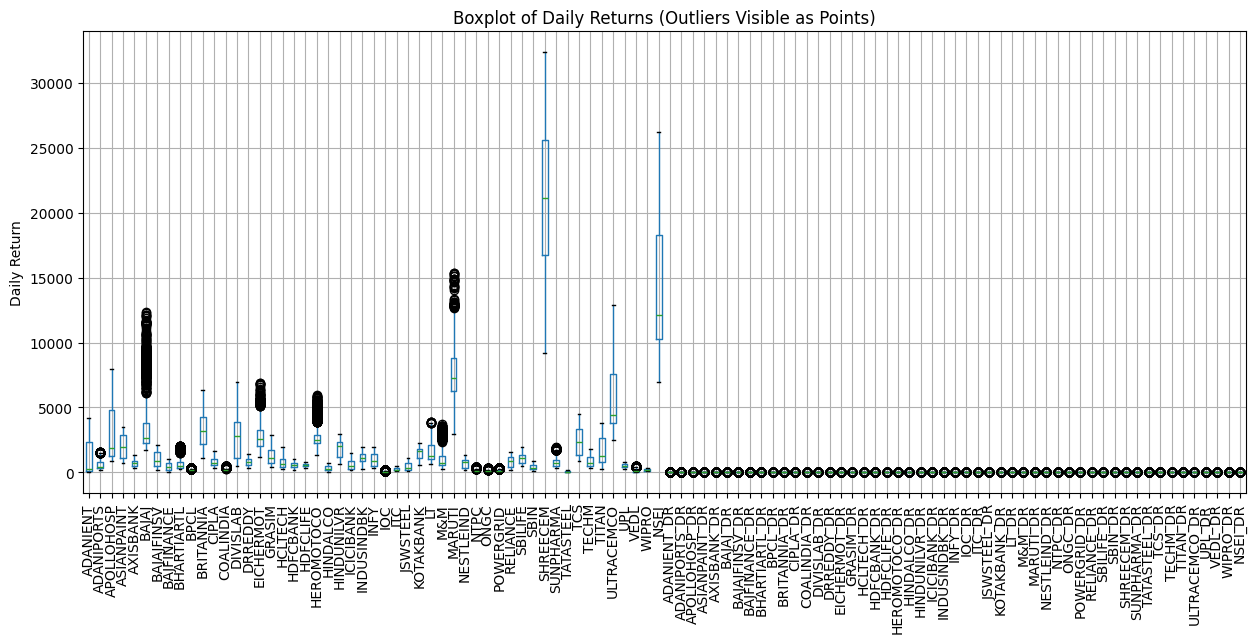

In [20]:
import matplotlib.pyplot as plt

# Boxplot for all stocks together
plt.figure(figsize=(15,6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of Daily Returns (Outliers Visible as Points)")
plt.ylabel("Daily Return")
plt.show()                           # Most of the stocks are in range -0.3 to +0.3 hence no need to remove outliers


### Corelation of each stock(in nifty50) with Nifty50
This will tells strength and direction of a stock with nifty50 

In [21]:
# Drop the Date column and keep only daily returns
returns = df.drop(columns=["Date"])

# Index column is NSIE_DR
index_col = "NSEI_DR"

correlations = {}

for col in returns.columns:
    if col == index_col:
        continue
    
    # Drop Nan rows for late-listed stocks SBILIFE and HDFCLIFE listed in 2017
    valid_data = returns[[index_col, col]].dropna()
    
    if len(valid_data) > 0:  # only compute if there is data
        correlations[col] = valid_data[index_col].corr(valid_data[col])

# Convert to Series and sort
correlations = pd.Series(correlations).sort_values(ascending=False)

In [ ]:
correlations

HDFCBANK_DR      0.727437
ICICIBANK_DR     0.706193
LT_DR            0.674315
AXISBANK_DR      0.662162
RELIANCE_DR      0.654724
SBIN_DR          0.647294
KOTAKBANK_DR     0.629872
BAJAJFINSV_DR    0.628712
BAJFINANCE_DR    0.621092
ULTRACEMCO_DR    0.620777
GRASIM_DR        0.620391
JSWSTEEL_DR      0.609263
MARUTI_DR        0.601877
HINDALCO_DR      0.600506
TATASTEEL_DR     0.597227
M&M_DR           0.586607
ADANIPORTS_DR    0.554969
INDUSINDBK_DR    0.554171
VEDL_DR          0.530109
HEROMOTOCO_DR    0.526051
HDFCLIFE_DR      0.525849
EICHERMOT_DR     0.522961
BAJAJ_DR         0.515250
INFY_DR          0.514942
SHREECEM_DR      0.514753
UPL_DR           0.512797
BPCL_DR          0.496739
TITAN_DR         0.495786
ITC_DR           0.492489
SBILIFE_DR       0.489133
ASIANPAINT_DR    0.485746
NTPC_DR          0.484541
IOC_DR           0.481061
TECHM_DR         0.479382
ADANIENT_DR      0.478800
TCS_DR           0.475504
ONGC_DR          0.466760
WIPRO_DR         0.463910
BHARTIARTL_D

### R-squared of the regression. and Index elasticity w.r.t. stock(β_stock_on_index)
**Single/linear regression**(single stock impact on nifty50 not all stock impact adjusted for that multiple regression)
* R² : This will tells us which stocks have the biggest contribution to nifty50 daily movement
* β_stock_on_index : How much index(nifty50) moves if stock moves 1%
* Impact = R² * β_stock_on_index

In [22]:
import statsmodels.api as sm

# Drop Date column if present
returns = df.drop(columns=["Date"], errors="ignore")

results = {}
index_col = "NSEI_DR"

for stock in returns.columns:
    if stock == index_col:
        continue
    
    valid_data = returns[[index_col, stock]].dropna()
    
    if len(valid_data) > 0:
        # Regression: Index ~ Stock → β_stock_on_index
        X = sm.add_constant(valid_data[stock])
        y = valid_data[index_col]
        model = sm.OLS(y, X).fit()
        
        results[stock] = {
            "r_squared": model.rsquared,
            "beta_stock_on_index": model.params[stock],
        }

# Convert to DataFrame and sort by R²
r2_Beta = pd.DataFrame(results).T.sort_values("r_squared", ascending=False)

# Calculate Impact of each stock on index
Impact = r2_Beta['Impact'] = r2_Beta['r_squared'] * r2_Beta['beta_stock_on_index']

In [24]:
# Calculate Impact Level based on Impact
# To classify impact levels requires domain knowledge to set thresholds
r2_Beta['Impact_Level'] = r2_Beta['Impact'].apply(
    lambda x: "High" if x > 0.12 else ("Medium" if x > 0.065 else "Low"))
   

In [25]:
import numpy as np

volatility = returns.std() * np.sqrt(252)
r2_Beta['Ann_Volatility'] = volatility


In [26]:
# Calculate Risk/Volatility Level based on Ann_Volatility,
# To classify Risk/Volatility levels requires domain knowledge to set thresholds
r2_Beta['Volatility_Level'] = r2_Beta['Ann_Volatility'].apply(
    lambda x: "High" if x > 0.30 else ("Medium" if x > 0.26 else "Low"))

In [27]:
# Calculating Impact Volatility Quadrant (IVQ) column
def impact_volatility_quadrant(row):
    if row['Impact_Level'] == "High" and row['Volatility_Level'] == "High":
        return "High Impact - High Risk"
    elif row['Impact_Level'] == "High" and row['Volatility_Level'] in ["Medium", "Low"]:
        return "High Impact - Low Risk"
    elif row['Impact_Level'] in ["Medium", "Low"] and row['Volatility_Level'] == "High":
        return "Low Impact - High Risk"
    else:
        return "Low Impact - Low Risk"

r2_Beta['ImpactVolatilityQuadrant'] = r2_Beta.apply(impact_volatility_quadrant, axis=1)


In [28]:
# Reset index to make stock names as a column
r2_Beta_reset = r2_Beta.reset_index().rename(columns={"index": "Stock"})
correlation_reset = correlations.reset_index().rename(columns={"index": "Stock", 0: "Correlation"})

# Merge on Stock(cooman Column) and keep left
merged_df = pd.merge(r2_Beta_reset, correlation_reset, on="Stock", how="left")

In [29]:
# Clean Stock names by removing _DR
merged_df['Stock'] = merged_df['Stock'].str.replace("_DR", "", regex=False)

# Reorder columns
merged_df = merged_df[['Stock', 'Correlation', 'r_squared', 'beta_stock_on_index', 'Impact', 'Impact_Level', 'Ann_Volatility', 'Volatility_Level', 'ImpactVolatilityQuadrant']]


In [ ]:
merged_df

,Stock,Correlation,r_squared,beta_stock_on_index,Impact,Impact_Level,Ann_Volatility,Volatility_Level,ImpactVolatilityQuadrant
0,HDFCBANK,0.727437,0.529165,0.526178,0.278435,High,0.225769,Low,High Impact - Low Risk
1,ICICIBANK,0.706193,0.498709,0.377380,0.188203,High,0.305594,High,High Impact - High Risk
2,LT,0.674315,0.454701,0.411275,0.187007,High,0.267751,Medium,High Impact - Low Risk
3,AXISBANK,0.662162,0.438459,0.331206,0.145220,High,0.326488,High,High Impact - High Risk
4,RELIANCE,0.654724,0.428664,0.391158,0.167675,High,0.273342,Medium,High Impact - Low Risk
5,SBIN,0.647294,0.418989,0.319685,0.133945,High,0.330659,High,High Impact - High Risk
6,KOTAKBANK,0.629872,0.396739,0.394443,0.156491,High,0.260776,Medium,High Impact - Low Risk
7,BAJAJFINSV,0.628712,0.395279,0.313193,0.123799,High,0.327824,High,High Impact - High Risk
8,BAJFINANCE,0.621092,0.385756,0.282500,0.108976,Medium,0.359037,High,Low Impact - High Risk
9,ULTRACEMCO,0.620777,0.385364,0.383625,0.147835,High,0.264259,Medium,High Impact - Low Risk


In [30]:
# Finally save to Excel
merged_df.to_excel(r"D:\Stock_Influence_Impact_Risk_to_Nifty50\notebooks\data\nifty50_influence_impact_risk_analysis.xlsx", index=False)

### Each column explaination and use with an example

**Correlation**(correlation with index(nifty50))
* It tells correlation between the stocks daily returns and Nifty50 daily returns.
* Close to +1 = the stock tends to move in the same direction as Nifty50 on most of the times or days.
* Close to 0 = stock moves independently of Nifty50.
* HDFCBANK = 0.7274 close to +1 means it moves 72% times with Nifty50.

**r_squared**(explanatory power)
* It tells the measure of influence of single stock on index(Nifty50).
* HDFCBANK = 0.5291 means 52% of daily NIFTY moves are statistically explained by HDFC Bank’s daily returns.

**beta_stock_on_index**(magnitude/strength of effect)
* It tells sensitivity of Nifty50 returns to a 1% move in the stock.
* If HDFCBANK moves 1% nifty will move 0.52%.

**Impact**(composite influence metric)
* This combines explanatory power (R²) and magnitude/strength of effect (β).
* Impact tells you how much influence a stock has on Nifty50 day to day movements combining both consistency (R²) and strength of effect (β).

**Impact_level**
* Derived by Impact and categorized(High, Medium, Low)

**Ann_Volatility**(Annualized Realized Volatility)
* It tells us how risky or stable a stock’s daily moves are when annualized.
* Its a std of daily returns and measures historical volatility.
* HDFCBANK = 0.2257 which means it has low volatility.

**Ann_Volatility_level**
* Derived by Ann_Volatility and categorized(High, Medium, Low)

**ImpactVolatilityQuadrant**(IVQ)
* IVQ combines impact level and annual volatility(risk) levels and tells us which stocks fall under high_impact+high_risk or low_impact+low_risk or high_impact+low_risk to make trading decisions
* HDFCBANK is HighImpact-LowRisk stock